In [10]:
# Importare le librerie necessarie
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
# Percorsi dei file
path = 'notebook/data'
transformed_csv = 'notebook/data/transformed_carTelemetry.csv'
model_path = 'notebook/data/random_forest_model.pkl'

# Verificare la presenza dei file
if not os.path.exists(transformed_csv):
    raise FileNotFoundError(f"File not found: {transformed_csv}")
else:
    print(f"File {transformed_csv} is in the directory {path}!")
    
if not os.path.exists(model_path):
    raise FileNotFoundError(f"File not found: {model_path}")
else:
        print(f"File {model_path} is in the directory {path}!")
        
print('All necessary files are ready for be used!')


File notebook/data/transformed_carTelemetry.csv is in the directory notebook/data!
File notebook/data/random_forest_model.pkl is in the directory notebook/data!
All necessary files are ready for be used!


In [20]:
car_telemetry_transformed = pd.read_csv(transformed_csv, header=None)

print('CSV Head: ')
print(car_telemetry_transformed.head())

# Impostare i nomi delle colonne direttamente
car_telemetry_transformed.columns = ['m_speed', 'm_throttle', 'm_steer', 'm_brake', 'm_clutch', 'm_gear', 'm_engineRPM', 'm_drs', 'm_revLightsPercent', 'm_revLightsBitValue', 'm_brakesTemperature', 'm_tyresSurfaceTemperature', 'm_tyresInnerTemperature', 'm_engineTemperature', 'm_tyresPressure', 'm_surfaceType']

print('\nColumns: ', car_telemetry_transformed.columns)

CSV Head: 
                    0                   1                     2   \
0              m_speed          m_throttle               m_steer   
1   0.3336395600634156  0.6030586804557893  -0.24545478810493895   
2   0.3627847576200192  0.6030586804557893   -0.3125384742636594   
3   0.4065025539549247  0.6030586804557893  -0.22716389963281067   
4  0.46479294906813196  0.6030586804557893   -0.1634537848494362   

                     3                     4                   5   \
0               m_brake              m_clutch              m_gear   
1  -0.34039106092349947  -0.07837414205275962  0.3285194888234599   
2  -0.34039106092349947  -0.07837414205275962  0.3285194888234599   
3  -0.34039106092349947  -0.07837414205275962  0.3285194888234599   
4  -0.34039106092349947  -0.07837414205275962  0.3285194888234599   

                    6                   7                    8   \
0          m_engineRPM               m_drs   m_revLightsPercent   
1  0.21126829855551585  1.59544

In [22]:
# Convertire tutte le colonne in numeri per evitare errori di tipo
car_telemetry_transformed = car_telemetry_transformed.apply(pd.to_numeric, errors='coerce')

print('CSV Head after conversion: ')
print(car_telemetry_transformed.head())

CSV Head after conversion: 
    m_speed  m_throttle   m_steer   m_brake  m_clutch    m_gear  m_engineRPM  \
0       NaN         NaN       NaN       NaN       NaN       NaN          NaN   
1  0.333640    0.603059 -0.245455 -0.340391 -0.078374  0.328519     0.211268   
2  0.362785    0.603059 -0.312538 -0.340391 -0.078374  0.328519     0.307518   
3  0.406503    0.603059 -0.227164 -0.340391 -0.078374  0.328519     0.374378   
4  0.464793    0.603059 -0.163454 -0.340391 -0.078374  0.328519     0.518385   

      m_drs  m_revLightsPercent  m_revLightsBitValue  m_brakesTemperature  \
0       NaN                 NaN                  NaN                  NaN   
1  1.595448            0.442103             0.676989            -0.049119   
2  1.595448            0.809401             1.173550            -0.088248   
3  1.595448            1.054266             1.173550            -0.120391   
4  1.595448            1.250159             1.173550            -0.187470   

   m_tyresSurfaceTemperature

In [25]:
# Rimuovere tutte le righe con valori NaN
car_telemetry_transformed = car_telemetry_transformed.dropna()

print('CSV Head after removing NaN values: ')
print(car_telemetry_transformed.head())

CSV Head after removing NaN values: 
    m_speed  m_throttle   m_steer   m_brake  m_clutch    m_gear  m_engineRPM  \
1  0.333640    0.603059 -0.245455 -0.340391 -0.078374  0.328519     0.211268   
2  0.362785    0.603059 -0.312538 -0.340391 -0.078374  0.328519     0.307518   
3  0.406503    0.603059 -0.227164 -0.340391 -0.078374  0.328519     0.374378   
4  0.464793    0.603059 -0.163454 -0.340391 -0.078374  0.328519     0.518385   
5  0.523083    0.603059 -0.109338 -0.340391 -0.078374  0.328519     0.650636   

      m_drs  m_revLightsPercent  m_revLightsBitValue  m_brakesTemperature  \
1  1.595448            0.442103             0.676989            -0.049119   
2  1.595448            0.809401             1.173550            -0.088248   
3  1.595448            1.054266             1.173550            -0.120391   
4  1.595448            1.250159             1.173550            -0.187470   
5  1.595448            1.250159             1.173550            -0.253152   

   m_tyresSurfaceTe

In [26]:
# Separare le feature dalla variabile target
X = car_telemetry_transformed.drop('m_speed', axis=1)
y = car_telemetry_transformed['m_speed']

print(f'X: {X}')
print(f'y: {y}')

X:      m_throttle   m_steer   m_brake  m_clutch    m_gear  m_engineRPM  \
1      0.603059 -0.245455 -0.340391 -0.078374  0.328519     0.211268   
2      0.603059 -0.312538 -0.340391 -0.078374  0.328519     0.307518   
3      0.603059 -0.227164 -0.340391 -0.078374  0.328519     0.374378   
4      0.603059 -0.163454 -0.340391 -0.078374  0.328519     0.518385   
5      0.603059 -0.109338 -0.340391 -0.078374  0.328519     0.650636   
..          ...       ...       ...       ...       ...          ...   
815   -1.886210 -0.203948 -0.340391 -0.078374 -0.198012    -5.731957   
816   -1.886210 -0.203948 -0.340391 -0.078374 -0.198012    -5.744447   
817   -1.886210 -0.203948 -0.340391 -0.078374 -0.198012    -5.746651   
818   -1.886210 -0.203948 -0.340391 -0.078374 -0.198012    -5.736365   
819   -1.886210 -0.203948 -0.340391 -0.078374 -0.198012    -5.723140   

        m_drs  m_revLightsPercent  m_revLightsBitValue  m_brakesTemperature  \
1    1.595448            0.442103             0.67698

In [32]:
# Caricare il modello addestrato
model = joblib.load(model_path)

# Funzione per effettuare la cross-validazione e calcolare gli errori
def cross_validate_model(X, y, model, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    mse_scores = []
    r2_scores = []
    mae_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        mae_scores.append(mae)

        print(f"Fold {len(mse_scores)} - Mean Squared Error: {mse}")
        print(f"Fold {len(mse_scores)} - R-squared: {r2}")
        print(f"Fold {len(mse_scores)} - Mean Absolute Error: {mae}")

        if len(mse_scores) == 3:
            print("\n\tDetailed analysis for fold 3:")
            print("\t\tActual vs. Predicted values sample:")
            for actual, pred in zip(y_test[:10], y_pred[:10]):
                print(f"\t\t\tActual: {actual}, Predicted: {pred}")

            outliers = y_test[(y_test - y_pred).abs() > 2 * mae]
            print("\n\t\tOutliers:")
            for outlier in outliers:
                print(f'\t\t\t{outlier}')
        
        print('---------------------------------------------------')
            
    print(f"Mean R-squared score: {np.mean(r2_scores)}")

    return mse_scores, r2_scores, mae_scores

# Eseguire la cross-validazione sul modello Random Forest
mse_scores, r2_scores, mae_scores = cross_validate_model(X, y, model)

Fold 1 - Mean Squared Error: 0.00372714074574295
Fold 1 - R-squared: 0.9965393971673614
Fold 1 - Mean Absolute Error: 0.03439237125857078
---------------------------------------------------
Fold 2 - Mean Squared Error: 0.004746074129455781
Fold 2 - R-squared: 0.9956899329295136
Fold 2 - Mean Absolute Error: 0.03462690983325198
---------------------------------------------------
Fold 3 - Mean Squared Error: 0.020631728024211066
Fold 3 - R-squared: 0.977763588543177
Fold 3 - Mean Absolute Error: 0.04549832747312984

	Detailed analysis for fold 3:
		Actual vs. Predicted values sample:
			Actual: 0.3336395600634156, Predicted: 0.33182202456819737
			Actual: 0.4647929490681319, Predicted: 0.46543786542012533
			Actual: 0.6396641344077538, Predicted: 0.6237246158756136
			Actual: 0.7125271282992629, Predicted: 0.7108542076278955
			Actual: 0.8145353197473757, Predicted: 0.8229256354348794
			Actual: 0.9602613075303938, Predicted: 0.9626270975267736
			Actual: 1.033124301421903, Predicted: 1.

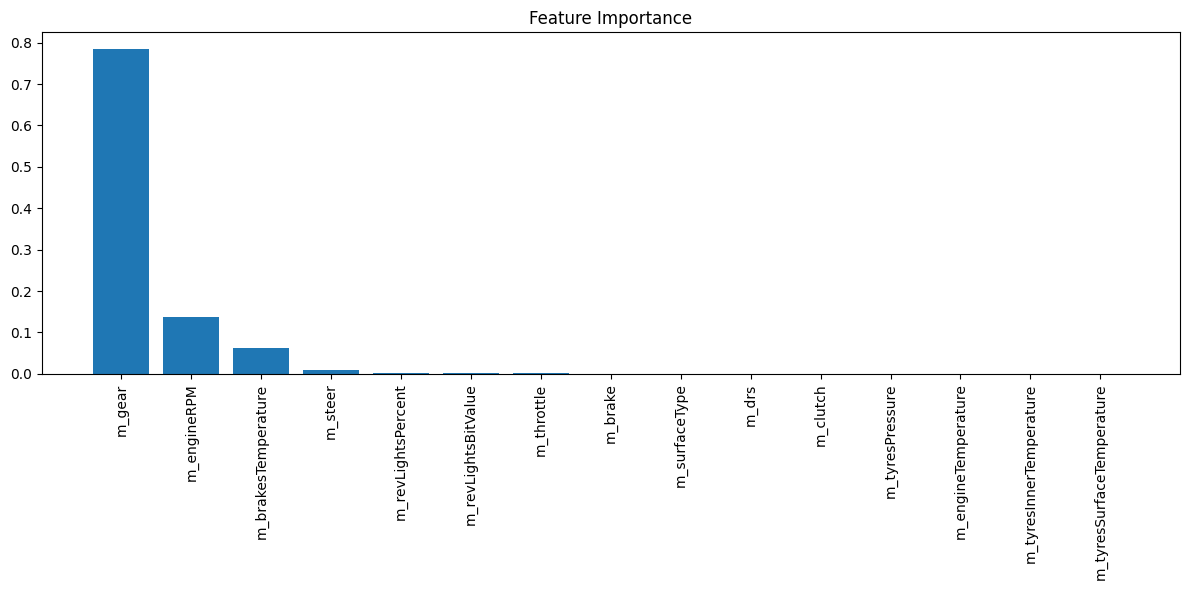

In [33]:
# Funzione per plottare l'importanza delle feature
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model, X)

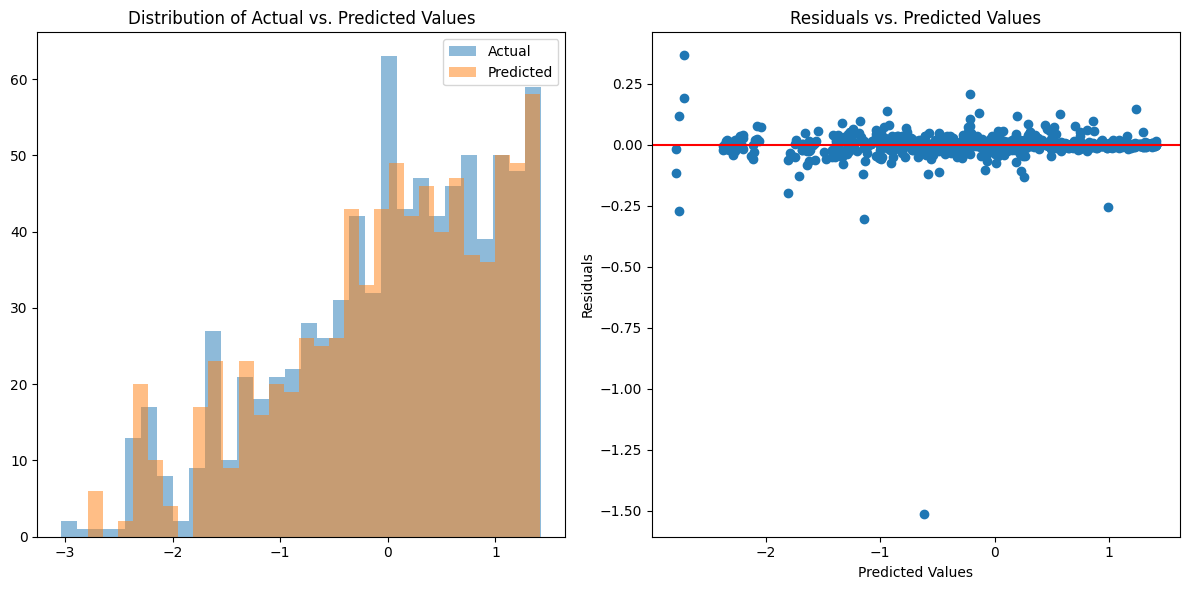

In [34]:
# Distribuzione dei valori reali vs. predetti
def plot_actual_vs_predicted(y, y_pred):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(y, bins=30, alpha=0.5, label='Actual')
    plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted')
    plt.legend(loc='upper right')
    plt.title('Distribution of Actual vs. Predicted Values')

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, y - y_pred)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

# Esempio di predizioni per l'uso nei grafici
y_pred = model.predict(X)
plot_actual_vs_predicted(y, y_pred)